In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile

In [2]:
# choose file
zf = ZipFile("res.zip")

# fill datasets
time_dfs = pd.DataFrame({"size":[], "type":[], "time":[], "opt_level":[]})

for name in zf.namelist():
    with zf.open(name) as file:
        opt_level = int(name[5])
        df = pd.read_csv(file, header=None, names=['size','type','time'], skiprows=0, delimiter=";")
        df["opt_level"] = opt_level
        time_dfs = pd.concat([time_dfs, df], axis=0, ignore_index=True).astype({'size':'int32', "opt_level":'int32'})

time_dfs

,size,type,time,opt_level
0,4,naive,0.000009,0
1,4,opt,0.000003,0
2,4,builtin,0.000029,0
3,2,naive,0.000007,0
4,2,opt,0.000003,0
...,...,...,...,...
538,4096,opt,33.193481,3
539,4096,builtin,7.364746,3
540,4096,naive,1081.298100,3
541,4096,opt,33.261353,3


In [3]:
# groupby repetitions of the same configuration
# then take the average, std, length and rename columns 
agg_times = time_dfs.groupby(["size","type","opt_level"]).agg(["mean", "std", len])
agg_times.columns = ['_'.join(col) for col in agg_times.columns.to_flat_index().values]
agg_times.rename(columns={"time_len":"samples"}, inplace=True)
agg_times.reset_index(inplace=True)
agg_times

,size,type,opt_level,time_mean,time_std,samples
0,1,builtin,0,0.000022,0.000015,4
1,1,builtin,1,0.000005,0.000008,3
2,1,builtin,2,0.000001,0.000000,3
3,1,builtin,3,0.000001,0.000000,3
4,1,naive,0,0.000005,0.000002,4
...,...,...,...,...,...,...
163,8192,naive,3,11204.087867,310.439391,3
164,8192,opt,0,2997.065107,72.816822,3
165,8192,opt,1,1179.707683,55.544325,3
166,8192,opt,2,438.825195,13.501936,3


In [4]:
# plot styling
lstyle_dict = {0:"dotted", 1:(0, (3, 1, 1, 1, 1, 1)), 2:(0, (5,1)), 3:"solid"}
col_dict = {"builtin":'#377eb8', "opt":'#ff7f00', "naive":'#4daf4a'}
label_dict = {"builtin":"Intrinsic", "opt":"Optimized", "naive":"Naive"}

### Plot of all the times

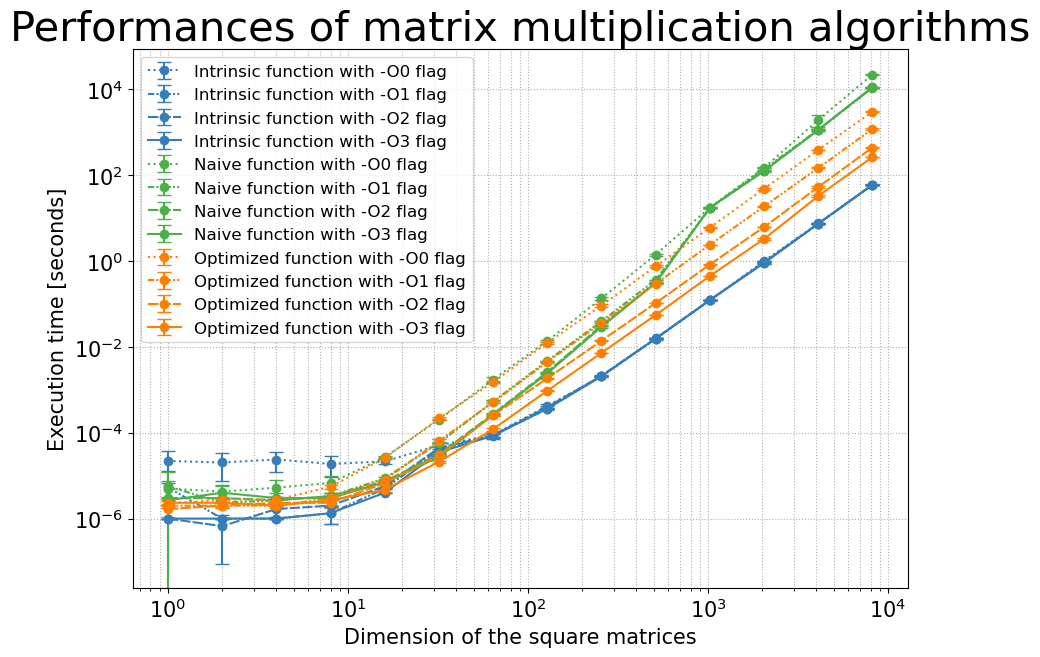

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for type, opt_level in list(agg_times.groupby(["type","opt_level"]).groups.keys()):
    plot_df = agg_times[(agg_times["type"]==type) & (agg_times["opt_level"]==opt_level)]
    ax.errorbar(x="size", y="time_mean", yerr="time_std", data=plot_df,
                fmt="o", label=f"{label_dict[type]} function with -O{opt_level} flag",
                capsize=5, linestyle=lstyle_dict[opt_level], c=col_dict[type])


ax.set_title("Performances of matrix multiplication algorithms", fontsize=30)
ax.set_xlabel("Dimension of the square matrices", fontsize=15)
ax.set_ylabel("Execution time [seconds]", fontsize=15)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(fontsize=12)

### Plot of all the times with no optimization

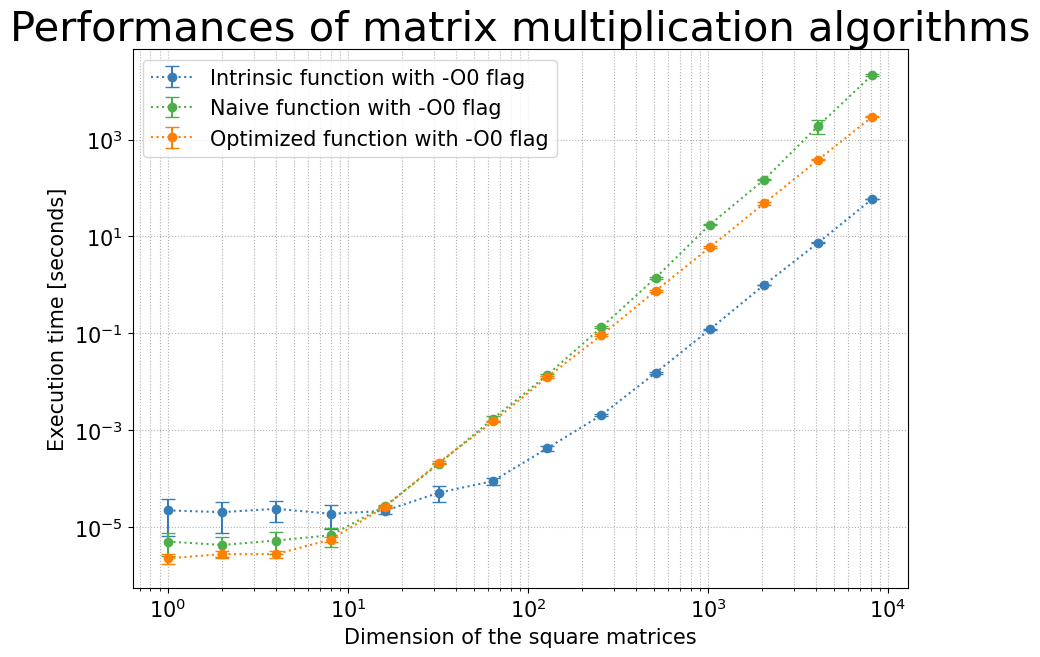

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for type in list(agg_times.groupby(["type"]).groups.keys()):
    opt_level = 0
    plot_df = agg_times[(agg_times["type"]==type) & (agg_times["opt_level"]==opt_level)]
    ax.errorbar(x="size", y="time_mean", yerr="time_std", data=plot_df,
                fmt="o", label=f"{label_dict[type]} function with -O{opt_level} flag",
                capsize=5, linestyle=lstyle_dict[opt_level], c=col_dict[type])


ax.set_title("Performances of matrix multiplication algorithms", fontsize=30)
ax.set_xlabel("Dimension of the square matrices", fontsize=15)
ax.set_ylabel("Execution time [seconds]", fontsize=15)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(fontsize=15)

### Plot of all the times with -O3 optimization

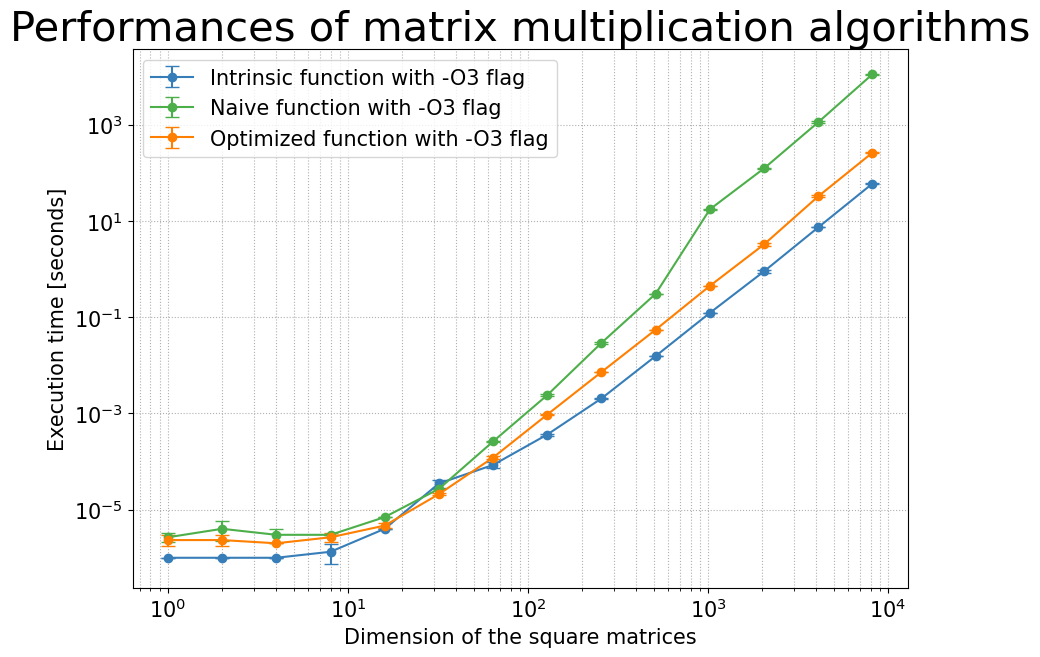

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for type in list(agg_times.groupby(["type"]).groups.keys()):
    opt_level = 3
    plot_df = agg_times[(agg_times["type"]==type) & (agg_times["opt_level"]==opt_level)]
    ax.errorbar(x="size", y="time_mean", yerr="time_std", data=plot_df,
                fmt="o", label=f"{label_dict[type]} function with -O{opt_level} flag",
                capsize=5, linestyle=lstyle_dict[opt_level], c=col_dict[type])


ax.set_title("Performances of matrix multiplication algorithms", fontsize=30)
ax.set_xlabel("Dimension of the square matrices", fontsize=15)
ax.set_ylabel("Execution time [seconds]", fontsize=15)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(fontsize=15)

### Plot of all the times with no and -O3 optimization

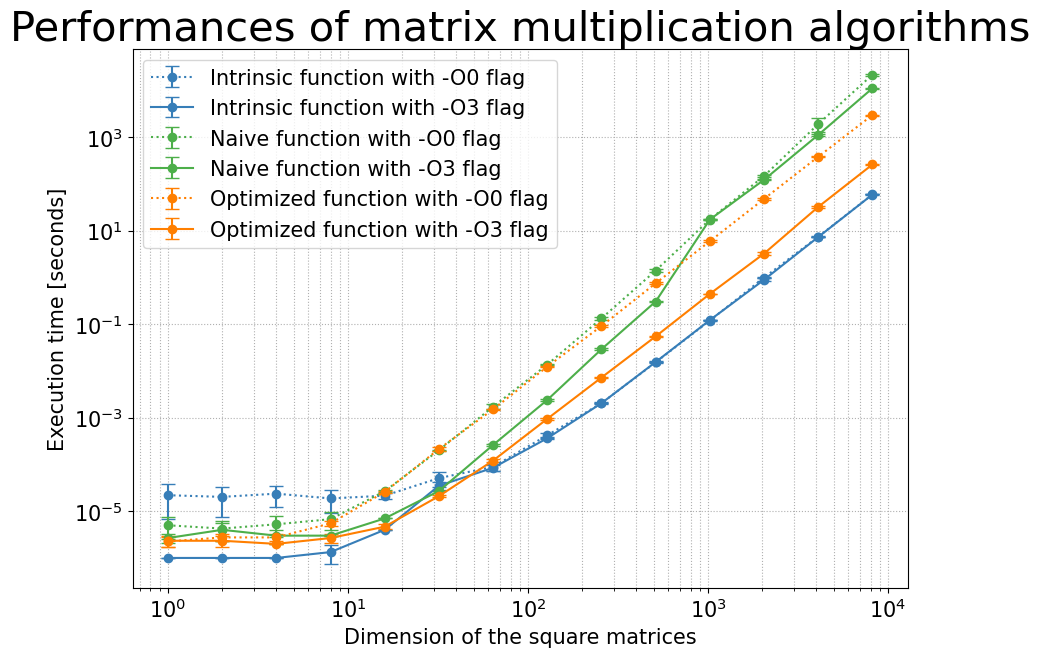

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for type, opt_level in ((x,y)
                        for x in list(agg_times.groupby(["type"]).groups.keys())
                        for y in [0,3]):
    plot_df = agg_times[(agg_times["type"]==type) & (agg_times["opt_level"]==opt_level)]
    ax.errorbar(x="size", y="time_mean", yerr="time_std", data=plot_df,
                fmt="o", label=f"{label_dict[type]} function with -O{opt_level} flag",
                capsize=5, linestyle=lstyle_dict[opt_level], c=col_dict[type])


ax.set_title("Performances of matrix multiplication algorithms", fontsize=30)
ax.set_xlabel("Dimension of the square matrices", fontsize=15)
ax.set_ylabel("Execution time [seconds]", fontsize=15)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(fontsize=15)

### Plot of all the times of the improved function

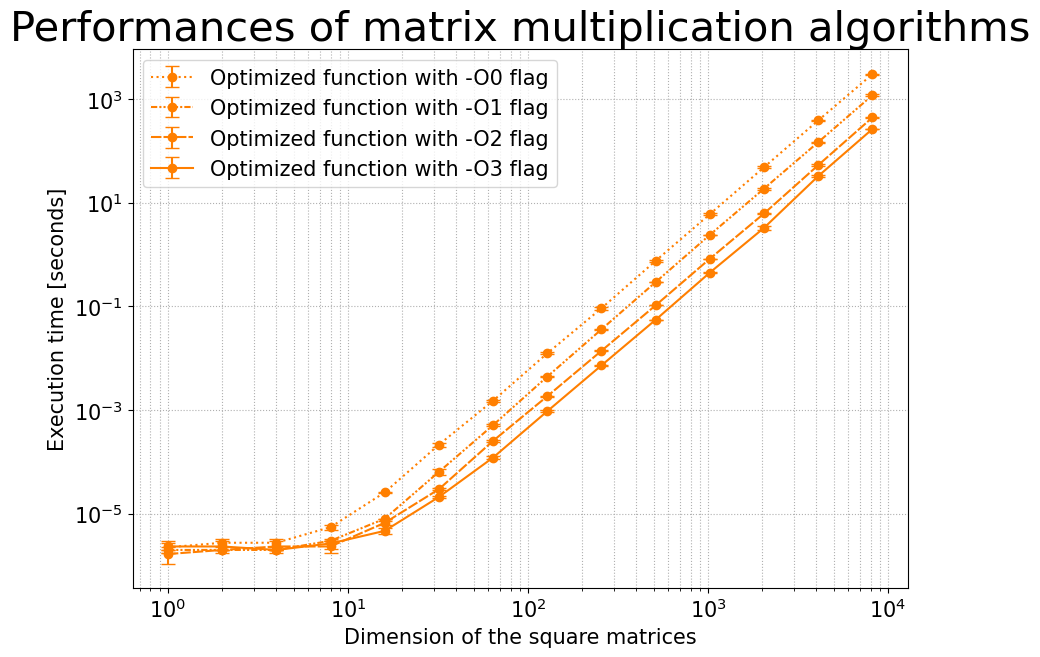

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for type, opt_level in ((x,y)
                        for x in ["opt"]
                        for y in list(agg_times.groupby(["opt_level"]).groups.keys())):
    plot_df = agg_times[(agg_times["type"]==type) & (agg_times["opt_level"]==opt_level)]
    ax.errorbar(x="size", y="time_mean", yerr="time_std", data=plot_df,
                fmt="o", label=f"{label_dict[type]} function with -O{opt_level} flag",
                capsize=5, linestyle=lstyle_dict[opt_level], c=col_dict[type])


ax.set_title("Performances of matrix multiplication algorithms", fontsize=30)
ax.set_xlabel("Dimension of the square matrices", fontsize=15)
ax.set_ylabel("Execution time [seconds]", fontsize=15)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(fontsize=15)